## Convolutional Neural Network Using SVM as Final Layer

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [3]:
!pwd '/content/drive/MyDrive/Kaggle'

/content


In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!kaggle datasets download -d fpeccia/weed-detection-in-soybean-crops

100% 2.36G/2.37G [01:10<00:00, 45.4MB/s]
100% 2.37G/2.37G [01:10<00:00, 35.8MB/s]


In [5]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/soybean/3137.tif  
  inflating: dataset/soybean/3138.tif  
  inflating: dataset/soybean/3139.tif  
  inflating: dataset/soybean/314.tif  
  inflating: dataset/soybean/3140.tif  
  inflating: dataset/soybean/3141.tif  
  inflating: dataset/soybean/3142.tif  
  inflating: dataset/soybean/3143.tif  
  inflating: dataset/soybean/3144.tif  
  inflating: dataset/soybean/3145.tif  
  inflating: dataset/soybean/3146.tif  
  inflating: dataset/soybean/3147.tif  
  inflating: dataset/soybean/3148.tif  
  inflating: dataset/soybean/3149.tif  
  inflating: dataset/soybean/315.tif  
  inflating: dataset/soybean/3150.tif  
  inflating: dataset/soybean/3151.tif  
  inflating: dataset/soybean/3152.tif  
  inflating: dataset/soybean/3153.tif  
  inflating: dataset/soybean/3154.tif  
  inflating: dataset/soybean/3155.tif  
  inflating: dataset/soybean/3156.tif  
  inflating: dataset/soybean/3157.tif  
  inflating: dataset/soybean/31

In [49]:
!rm -rf '/content/dataset/soybean'

In [50]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/data/dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/data/dataset"))
file_count = len(files)
# print(file_count)

['grass', 'broadleaf', 'soybean', 'soil']


In [52]:
# Make new base directory
original_dataset_dir = '/content/data/dataset'
base_dir = '/content/data/dataset/cropweed-data/'
os.mkdir(base_dir)

In [53]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create five folders 
# (broadleaf, grass, soil, soybean)

train_cloud_dir = os.path.join(train_dir, 'broadleaf')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'grass')
os.mkdir(train_foggy_dir)

train_rainy_dir = os.path.join(train_dir, 'soil')
os.mkdir(train_rainy_dir)

train_shine_dir = os.path.join(train_dir, 'soybean')
os.mkdir(train_shine_dir)

#Under validation folder create five folders 
# (broadleaf, grass, soil, soybean)

validation_cloud_dir = os.path.join(validation_dir, 'broadleaf')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(validation_dir, 'grass')
os.mkdir(validation_foggy_dir)

validation_rainy_dir = os.path.join(validation_dir, 'soil')
os.mkdir(validation_rainy_dir)

validation_shine_dir = os.path.join(validation_dir, 'soybean')
os.mkdir(validation_shine_dir)


In [54]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [57]:
BROADLEAF_SOURCE_DIR = '/content/data/dataset/broadleaf/'
TRAINING_BROADLEAF_DIR = '/content/data/dataset/cropweed-data/train/broadleaf/'
VALID_BROADLEAF_DIR = '/content/data/dataset/cropweed-data/validation/broadleaf/'

GRASS_SOURCE_DIR = '/content/data/dataset/grass/'
TRAINING_GRASS_DIR = '/content/data/dataset/cropweed-data/train/grass/'
VALID_GRASS_DIR = '/content/data/dataset/cropweed-data/validation/grass/'

SOIL_SOURCE_DIR = '/content/data/dataset/soil/'
TRAINING_SOIL_DIR = '/content/data/dataset/cropweed-data/train/soil/'
VALID_SOIL_DIR = '/content/data/dataset/cropweed-data/validation/soil/'

SOYBEAN_SOURCE_DIR = '/content/data/dataset/soybean/'
TRAINING_SOYBEAN_DIR = '/content/data/dataset/cropweed-data/train/soybean/'
VALID_SOYBEAN_DIR = '/content/data/dataset/cropweed-data/validation/soybean/'


In [58]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(BROADLEAF_SOURCE_DIR, TRAINING_BROADLEAF_DIR, VALID_BROADLEAF_DIR, split_size)
split_data(GRASS_SOURCE_DIR, TRAINING_GRASS_DIR, VALID_GRASS_DIR, split_size)
split_data(SOIL_SOURCE_DIR, TRAINING_SOIL_DIR, VALID_SOIL_DIR, split_size)
split_data(SOYBEAN_SOURCE_DIR, TRAINING_SOYBEAN_DIR, VALID_SOYBEAN_DIR, split_size)

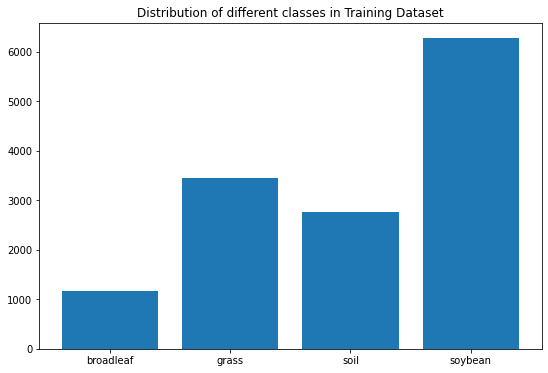

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['broadleaf', 'grass', 'soil', 'soybean']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/data/dataset/cropweed-data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

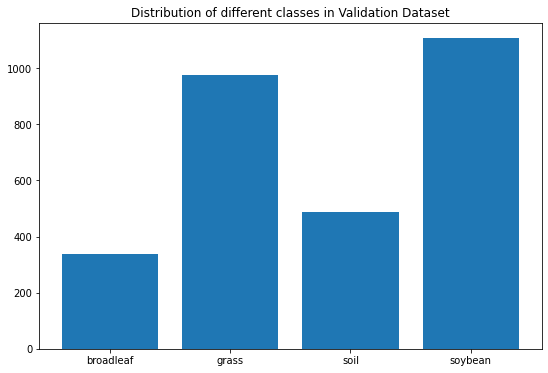

In [70]:
image_folder = ['broadleaf', 'grass', 'soil', 'soybean']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/data/dataset/cropweed-data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [71]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [72]:
tf.__version__

'2.4.1'

In [73]:
img_width=256; img_height=256
batch_size=16

TRAINING_DIR = '/content/data/dataset/cropweed-data/train'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))


Found 13638 images belonging to 4 classes.


In [75]:
VALIDATION_DIR = '/content/data/dataset/cropweed-data/validation'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 2906 images belonging to 4 classes.


In [76]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/ML PROJECT/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [77]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [81]:
img_width=256; img_height=256
batch_size=16

# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=(img_height, img_width, 3)))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
#cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation ='linear'))

## for mulitclassification
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [82]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               4194432   
_________________________________________________________________
dense_12 (Dense)             (None, 4)                

In [84]:
# Part 3 - Training the CNN
history = cnn.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/10
853/853 [==============================] - 479s 562ms/step - loss: 0.9158 - accuracy: 0.8337 - val_loss: 0.9025 - val_accuracy: 0.8544
Epoch 2/10
853/853 [==============================] - 471s 552ms/step - loss: 0.8805 - accuracy: 0.8697 - val_loss: 0.8918 - val_accuracy: 0.8613
Epoch 3/10
853/853 [==============================] - 479s 562ms/step - loss: 0.8681 - accuracy: 0.8817 - val_loss: 0.8996 - val_accuracy: 0.8476
Epoch 4/10
853/853 [==============================] - 473s 555ms/step - loss: 0.8612 - accuracy: 0.8877 - val_loss: 0.8608 - val_accuracy: 0.8909
Epoch 5/10
853/853 [==============================] - 478s 560ms/step - loss: 0.8518 - accuracy: 0.8977 - val_loss: 0.8780 - val_accuracy: 0.8692
Epoch 6/10
853/853 [==============================] - 477s 559ms/step - loss: 0.8506 - accuracy: 0.8997 - val_loss: 0.8588 - val_accuracy: 0.8909
Epoch 7/10
853/853 [==============================] - 471s 552ms/step - loss: 0.8372 - accuracy: 0.9139 - val_loss: 0.8522 -

In [91]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('/content/drive/MyDrive/ML PROJECT/SVMCNN.h5')

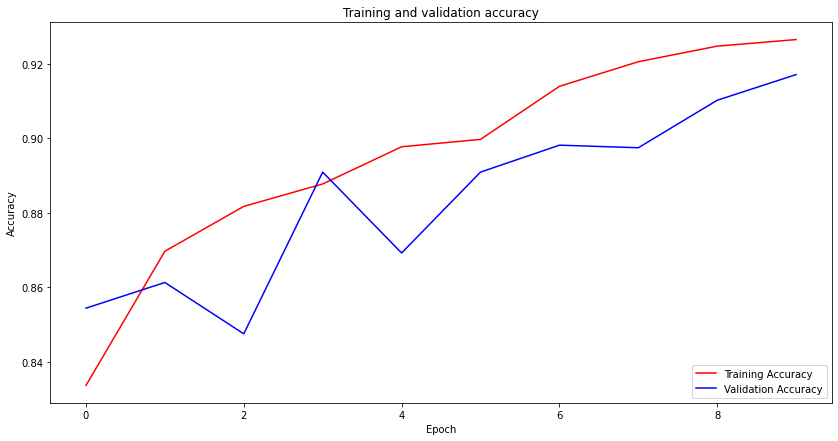

In [85]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

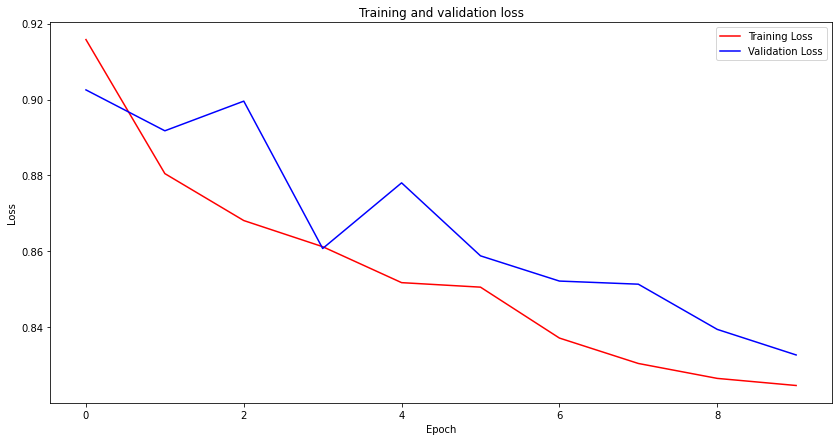

In [86]:

fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/dataset/alien_test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [ ]:

from tensorflow.keras.models import load_model
 
# load model
model = load_model('/content/drive/MyDrive/ML PROJECT/SVMCNN.h5')